In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from util import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
matplotlib.rcParams['figure.figsize'] = [12, 8]

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
raw_data = pd.read_csv("raw_data_new.csv", parse_dates=[0], index_col=0)
raw_data

,pm25,t2m,d2m,u10,v10,sp,t500,t850,t1000,q500,...,q1000,u500,u850,u1000,v500,v850,v1000,w500,w850,w1000
2014-01-01 08:00:00,51.0,270.487368,258.980250,2.507680,-0.658156,97997.728951,248.554676,270.020533,276.617789,0.000131,...,0.001265,23.046411,10.548611,3.180156,-20.240968,-9.274819,-0.819754,-0.362159,0.270265,0.257394
2014-01-01 14:00:00,23.0,283.838611,258.241520,3.154037,-0.050984,98048.881796,249.264215,270.571515,282.831868,0.000194,...,0.001557,23.175371,8.060430,3.081539,-16.076533,-5.246438,0.187835,-0.213867,0.326162,0.170515
2014-01-01 20:00:00,66.0,273.009328,261.723400,1.842218,-1.248453,98354.616140,248.722481,271.406578,282.505506,0.000195,...,0.001777,23.576161,6.588762,1.987903,-10.424377,-6.522191,-1.084960,-0.113473,0.107447,0.193131
2014-01-02 02:00:00,127.0,270.101179,262.794066,0.369782,-1.550008,98568.984998,248.943138,271.072288,278.768867,0.000185,...,0.001637,18.130736,5.157552,0.032000,-7.689495,-0.974540,-2.949295,0.033899,-0.050130,0.173733
2014-01-02 08:00:00,119.0,268.554291,262.665035,0.382165,-1.082520,98565.141143,248.187354,271.501711,275.817080,0.000187,...,0.001611,17.444210,7.410570,0.221648,-2.653525,2.969054,-1.754386,0.091726,-0.135630,0.127581
2014-01-02 14:00:00,108.0,281.021141,262.805886,1.372043,0.864305,98220.376883,249.590576,273.640898,279.917078,0.000165,...,0.001549,22.720216,8.290536,1.422752,-4.169837,1.569078,0.806979,0.041438,0.067731,0.040518
2014-01-02 20:00:00,168.0,274.254307,263.928755,1.946937,-1.228454,98300.802165,249.183615,272.620853,281.459036,0.000551,...,0.001680,17.466968,6.941507,2.047326,-1.737625,-6.505430,-1.026792,-0.127448,0.222734,0.176215
2014-01-03 02:00:00,122.0,273.074404,262.622681,1.463319,-2.884348,98494.769021,247.280942,271.582311,278.024974,0.000362,...,0.001649,15.818295,2.872926,2.037211,-3.809984,-11.719848,-4.760390,-0.027514,0.467191,0.325794
2014-01-03 08:00:00,30.0,270.140652,260.127744,0.696676,-2.797163,98825.044903,245.507756,269.041449,273.967259,0.000186,...,0.001449,9.958174,-4.042902,1.067478,-8.480185,-10.603811,-4.742644,0.099449,0.074810,0.313658
2014-01-03 14:00:00,16.0,280.057803,259.841117,0.031922,-1.408137,98795.476785,245.383553,267.792819,278.764903,0.000231,...,0.001501,8.070545,0.350609,0.160961,-9.105245,-4.878698,-1.426081,0.152680,-0.017033,0.089704


In [7]:
# Setting parameters
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 10
predict_hours = 3
n_features = 21

In [8]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(raw_data)
reframed = series_to_supervised(scaled, lag_hours, predict_hours)

In [9]:
# Turn off shuffle, because it's a sequense model!!!
train, test = train_test_split(reframed.values, train_size=0.8, test_size=0.2, shuffle=False)
train_X = train[:, :n_features*lag_hours]

# select the pm25 data we want to predict
pm25_select = []
for i in range(predict_hours , 0, -1):
    pm25_select.append(-n_features * i)
    
train_y = train[:, pm25_select]
test_X = test[:, :n_features*lag_hours]
test_y = test[:, pm25_select]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4380, 210) (4380, 3) (1096, 210) (1096, 3)


In [10]:
train_X = train_X.reshape(train_X.shape[0], lag_hours, 21)
test_X = test_X.reshape(test_X.shape[0], lag_hours, 21)

# LSTM using Keras

In [11]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 2s - loss: 0.1240 - val_loss: 0.0642
Epoch 2/100
 - 1s - loss: 0.0834 - val_loss: 0.0531
Epoch 3/100
 - 1s - loss: 0.0754 - val_loss: 0.0603
Epoch 4/100
 - 1s - loss: 0.0785 - val_loss: 0.1053
Epoch 5/100
 - 1s - loss: 0.0922 - val_loss: 0.0861
Epoch 6/100
 - 1s - loss: 0.0749 - val_loss: 0.0558
Epoch 7/100
 - 1s - loss: 0.0690 - val_loss: 0.0515
Epoch 8/100
 - 1s - loss: 0.0663 - val_loss: 0.0503
Epoch 9/100
 - 1s - loss: 0.0659 - val_loss: 0.0666
Epoch 10/100
 - 1s - loss: 0.0693 - val_loss: 0.0460
Epoch 11/100
 - 1s - loss: 0.0667 - val_loss: 0.0523
Epoch 12/100
 - 1s - loss: 0.0648 - val_loss: 0.0573
Epoch 13/100
 - 1s - loss: 0.0665 - val_loss: 0.0423
Epoch 14/100
 - 1s - loss: 0.0652 - val_loss: 0.0472
Epoch 15/100
 - 1s - loss: 0.0644 - val_loss: 0.0626
Epoch 16/100
 - 1s - loss: 0.0658 - val_loss: 0.0422
Epoch 17/100
 - 1s - loss: 0.0624 - val_loss: 0.0418
Epoch 18/100
 - 1s - loss: 0.0611 - val_loss: 0.0500
Epoch 1

In [12]:
# inverse transform
def inv_normalization(y, predict_hours):
    if len(y.shape) == 1:
        y = y[:, np.newaxis]
        print(y.shape)
        
    inv_y = np.copy(y)
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = y[:, i]
        y_ = y_.reshape(len(y), 1)
        raw_ = np.tile(y_, (1, 21))
        inv_ = scaler.inverse_transform(raw_)
        inv_y[:, i] = inv_[:, 0]
    return inv_y

In [13]:
ypredict = model.predict(test_X)

In [14]:
pm25_predict = inv_normalization(ypredict, predict_hours)
pm25_actual = inv_normalization(test_y, predict_hours)

In [11]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
20.432814783460874
rmse:
34.53821045341537
predict_hours 1
mae:
26.918406097014454
rmse:
43.08356800075191
predict_hours 2
mae:
30.87214096505059
rmse:
48.47983423675518


In [1]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

NameError: name 'predict_hours' is not defined

## Linear model

In [33]:
from sklearn import linear_model

In [34]:
# linear regression
train_X_reshaped = train_X.reshape((train_X.shape[0], train_X.shape[1] * train_X.shape[2]))

reg = linear_model.LinearRegression()
reg.fit(train_X_reshaped, train_y)
y_predict_lr = reg.predict(test_X.reshape((test_X.shape[0], test_X.shape[1] * test_X.shape[2])))

pm25_predict_lr = inv_normalization(y_predict_lr, predict_hours)


In [35]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict_lr[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict_lr[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
27.087382308086053
rmse:
39.37751484350621
predict_hours 1
mae:
34.778546998006
rmse:
49.09392774157512
predict_hours 2
mae:
39.853395021346635
rmse:
54.88306491230452


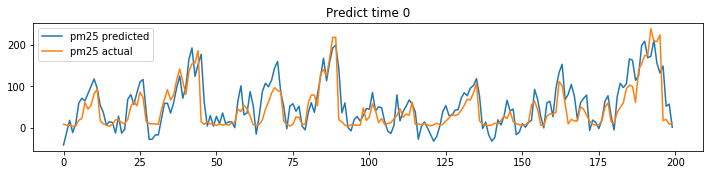

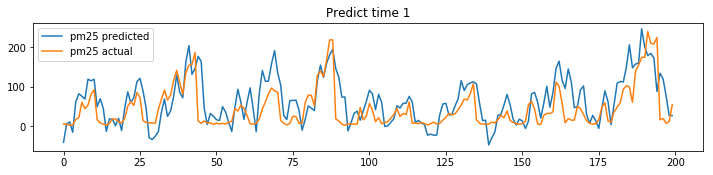

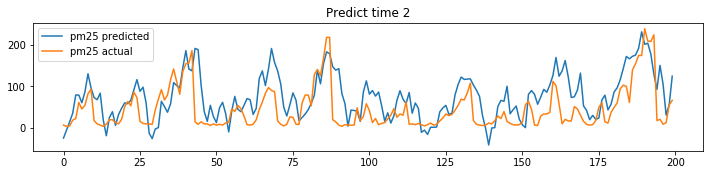

In [36]:
# Plot for linear regression
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lr[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [24]:
t = np.tile(ypredict,(1,5))

In [167]:
train_y.shape

(2131, 1)

In [108]:
ypredict.shape

(532, 3)

In [121]:
pm25_actual.shape

(532, 3)

In [116]:
pm25_predict[:,1]

array([ 0.02512626,  0.13157386,  0.42580077,  0.01957737,  0.06231519,
        0.02118389,  0.16410474,  0.05062803,  0.07270921,  0.01696643,
        0.13278526,  0.10435077,  0.05019544,  0.17845559,  0.05315086,
        0.07699878,  0.03578535,  0.20254955,  0.00799736,  0.03828513,
        0.03645626, -0.02934895,  0.07096433,  0.05544633,  0.00306354,
       -0.00184802,  0.0489907 ,  0.045976  ,  0.08306812,  0.26169065,
        0.06274786,  0.05632127,  0.28027174,  0.06150862,  0.03163888,
        0.01078969,  0.02413501,  0.1811978 ,  0.03442261,  0.07689123,
        0.03582137,  0.11131186, -0.00857573,  0.07133815,  0.09203243,
        0.09898623,  0.04388558,  0.06305756,  0.04395104,  0.1310133 ,
        0.08464725,  0.02060915,  0.2815719 ,  0.10502711,  0.14615808,
        0.05662401,  0.06258877,  0.05891931,  0.07595711,  0.13015519,
        0.34132555,  0.04103775,  0.38648757,  0.19144152,  0.01765127,
        0.01077341,  0.23759626,  0.16167738,  0.01709972,  0.15

# LSTM implemented by PyTorch

In [43]:
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

import utility as util

global logger

util.setup_log()
# util.setup_path()
logger = util.logger

In [44]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, logger=logger):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.logger = logger
        
    def forward(self, input_data):
        #Set initial states
        h0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        
        #Forward propagation of RNN
        out, self.hidden = self.lstm(input_data, (h0, c0))
        
        #Decode hidden state of last time step, and followed by a fully connected layer
        out = self.fc(out[:, -1, :])

        return out


In [45]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)

(4380, 10, 21)
(1096, 10, 21)
(4380, 3)


In [46]:
class LSTM_model:
    def __init__(self, input_size, hidden_size, num_layers, output_size, lag_hours, logger,
                 learning_rate = 0.001, batch_size = 200):
        self.rnn = LSTM(input_size=input_size, hidden_size=64, num_layers=1, output_size=output_size)

        # Loss and Optimizer
        self.lag_hours = lag_hours
        self.batch_size = batch_size
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.rnn.parameters(), lr=learning_rate)
        
    def train_SGD(self, train_X, train_y, num_epochs = 10):
        # Train the Model
        # SGD
        for epoch in range(num_epochs):
            for i, (X, y) in enumerate(zip(train_X, train_y)):
                X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
                y_true = torch.from_numpy(y).type(torch.FloatTensor)

                # Forward + Backward + Optimize
                self.optimizer.zero_grad()
        #         logger.info("Shape of X: %s", X_.shape)
                y_pred = self.rnn(X_).squeeze()
        #         logger.info("Shape of y_pred: %s", y_pred)
                loss = self.criterion(y_pred, y_true)

        #         logger.info("Loss: %s", loss)
                loss.backward()
                optimizer.step()

                if (i+1) % 100 == 0:
                    print ('Epoch [%d/%d],  Loss: %.4f' 
                           %(epoch+1, num_epochs,  loss.data[0]))
                    print('y_pred: %.4f, y_true: %.4f'%(y_pred[0], y_true[0]))
                    
    def train_MBGD(self, train_X, train_y, num_epochs = 10):
        # mini-batch
        for epoch in range(num_epochs):
            # pick a random batch 
            rand_idx = np.random.randint(train_X.shape[0] - self.batch_size)
            X_ = torch.from_numpy(train_X[rand_idx : rand_idx + self.batch_size, :, :]).type(torch.FloatTensor)
            y_true = torch.from_numpy(train_y[rand_idx : rand_idx + self.batch_size, :]).type(torch.FloatTensor)
            # Forward + Backward + Optimize
            self.optimizer.zero_grad()
    #         logger.info("Shape of X: %s", X_.shape)
            y_pred = self.rnn(X_).squeeze()
    #         logger.info("Shape of y_pred: %s", y_pred)
            loss = self.criterion(y_pred, y_true)

    #         logger.info("Loss: %s", loss)
            loss.backward()
            self.optimizer.step()

            if (epoch+1) % 10 == 0:
                print ('Epoch [%d/%d],  Loss: %.4f' 
                       %(epoch+1, num_epochs,  loss.data[0]))
#                 print('y_pred: %.4f, y_true: %.4f'%(y_pred[0], y_true[0]))
    
    def predict(self, X):
        # Process the input data X
        X_ = torch.from_numpy(test_X).type(torch.FloatTensor)
        
        return self.rnn(X_).squeeze().detach().numpy()

# print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total)) 


In [47]:
lstm_model = LSTM_model(input_size=n_features, hidden_size=50, num_layers=1, output_size=predict_hours, lag_hours=10, learning_rate=0.001, batch_size=72, logger=logger)
lstm_model.train_MBGD(train_X, train_y, num_epochs=2000)

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [10/2000],  Loss: 0.0108
Epoch [20/2000],  Loss: 0.0285
Epoch [30/2000],  Loss: 0.0067
Epoch [40/2000],  Loss: 0.0183
Epoch [50/2000],  Loss: 0.0120
Epoch [60/2000],  Loss: 0.0039
Epoch [70/2000],  Loss: 0.0148
Epoch [80/2000],  Loss: 0.0086
Epoch [90/2000],  Loss: 0.0058
Epoch [100/2000],  Loss: 0.0063
Epoch [110/2000],  Loss: 0.0164
Epoch [120/2000],  Loss: 0.0056
Epoch [130/2000],  Loss: 0.0032
Epoch [140/2000],  Loss: 0.0046
Epoch [150/2000],  Loss: 0.0061
Epoch [160/2000],  Loss: 0.0077
Epoch [170/2000],  Loss: 0.0061
Epoch [180/2000],  Loss: 0.0044
Epoch [190/2000],  Loss: 0.0075
Epoch [200/2000],  Loss: 0.0044
Epoch [210/2000],  Loss: 0.0150
Epoch [220/2000],  Loss: 0.0041
Epoch [230/2000],  Loss: 0.0105
Epoch [240/2000],  Loss: 0.0100
Epoch [250/2000],  Loss: 0.0077
Epoch [260/2000],  Loss: 0.0052
Epoch [270/2000],  Loss: 0.0054
Epoch [280/2000],  Loss: 0.0064
Epoch [290/2000],  Loss: 0.0036
Epoch [300/2000],  Loss: 0.0078
Epoch [310/2000],  Loss: 0.0121
Epoch [320/2000],

In [48]:
# Test the Model
y_pred = np.zeros(test_y.shape)
for i, (X, y) in enumerate(zip(test_X, test_y)):
#     print(X)
    X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
#     logger.info("Shape of X: %s", X_.shape)
    y_pred[i] = lstm_model.rnn(X_).squeeze().detach().numpy()


In [49]:
pm25_predict_lstm = inv_normalization(y_pred, predict_hours=3)

In [50]:
pm25_actual = inv_normalization(test_y, predict_hours=3)

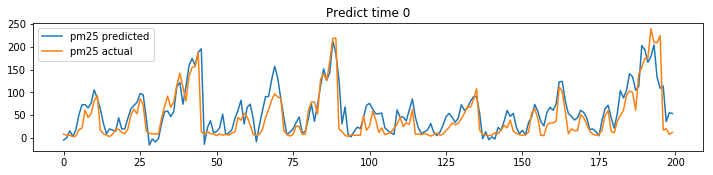

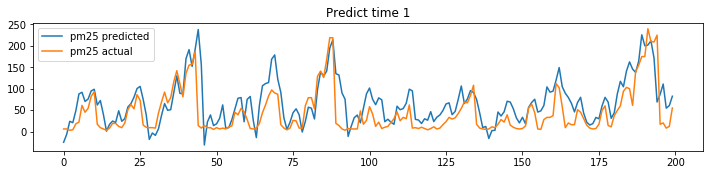

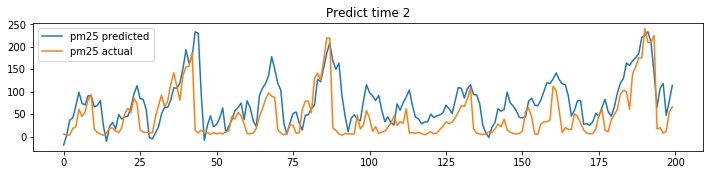

In [51]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lstm[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [52]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict_lstm[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict_lstm[:, i], pm25_actual[:, i])))
    print("mape:")
    print(mean_absolute_percentage_error(pm25_predict_lstm[:, 2], pm25_actual[:, 2]))

predict_hours 0
mae:
25.410261510645316
rmse:
38.16719348346503
mape:
0.5696964289721885
predict_hours 1
mae:
34.87922556221784
rmse:
49.21440142077754
mape:
0.5696964289721885
predict_hours 2
mae:
38.88617620150131
rmse:
54.36694269335991
mape:
0.5696964289721885


In [53]:
pm25_predict_lstm

array([[  7.18691928,  20.24701607,  37.60848834],
       [ -5.42624196,   1.50003192,  28.27294846],
       [ 47.96418476,  57.70452608,  66.25610329],
       ...,
       [ 35.84769479,  54.52262363,  47.3027169 ],
       [ 55.33455375,  60.51570734,  79.42688341],
       [ 53.63000761,  82.36994463, 114.27164185]])

In [16]:
ypredict.shape

(1096, 3)

In [18]:
a = pm25_actual[:, 0]

In [25]:
print(math.sqrt(mean_squared_error(a[:-3], a[3:])))

57.177289652160525


In [21]:
a[:-1]

array([15., 10.,  5., ..., 17., 20.,  8.])

In [22]:
a[1:]

array([10.,  5., 42., ..., 20.,  8., 12.])

In [28]:
mean_absolute_percentage_error(a[:-3], a[3:])

0.9889470553436004

In [27]:
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 1

In [40]:
mean_absolute_percentage_error(pm25_predict_lstm[:, 2], pm25_actual[:, 2])

NameError: name 'pm25_predict_lstm' is not defined

In [39]:
pm25_predict_lr[:, 2][-200:]

array([-2.55769176e+01, -5.85323309e+00,  1.38307177e+01,  3.47682027e+01,
        7.90537786e+01,  7.88915956e+01,  6.02924303e+01,  8.62682687e+01,
        1.30596536e+02,  9.61890357e+01,  7.27297373e+01,  6.76407314e+01,
        8.35233287e+01,  1.81927718e+01, -1.97399183e+01,  2.41031223e+01,
        3.84787266e+01,  5.31457687e+00,  3.17777698e+01,  4.70081715e+01,
        5.99093935e+01,  5.80533024e+01,  6.63353788e+01,  9.10075614e+01,
        1.16489718e+02,  8.79647512e+01,  9.80527495e+01,  5.99829873e+01,
       -1.38770452e+01, -2.67061499e+01, -3.46652464e+00, -4.98945547e-02,
        6.38519083e+01,  5.10370127e+01,  3.72680069e+01,  5.75261958e+01,
        1.09188197e+02,  1.01908575e+02,  9.62069373e+01,  1.45195840e+02,
        1.86762969e+02,  1.41808291e+02,  1.37848012e+02,  1.92170063e+02,
        1.89254942e+02,  1.01668507e+02,  3.88937301e+01,  1.51655019e+01,
        5.40154865e+01,  2.66293812e+01,  1.19632417e+01,  4.79027662e+01,
        6.12668009e+01,  